In [2]:
# imports required packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",
  "features_path"   : "C:/Users/avish/Desktop/cdd/car_damage_check/features.h5",
  "labels_path"     : "C:/Users/avish/Desktop/cdd/car_damage_check/labels.h5",
  "classifier_path" : "C:/Users/avish/Desktop/cdd/car_damage_check/classifier.pickle",
  "model_path"      : "C:/Users/avish/Desktop/cdd/car_damage_check/model",

  "test_size"       : 0.20,
  "seed"            : 9,
}

In [4]:
# config variables
test_size     = config["test_size"]
seed      = config["seed"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
classifier_path = config["classifier_path"]

In [5]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [6]:
labels.shape

(1840,)

In [7]:
# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] features shape: (1840, 4096)
[INFO] labels shape: (1840,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (1472, 4096)
[INFO] test data   : (368, 4096)
[INFO] train labels: (1472,)
[INFO] test labels : (368,)


In [8]:
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


C:\Users\avish\anaconda3\envs\majorenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=9)

In [9]:
# evaluate the model of test data
preds = model.predict(testData)

In [10]:
# dump classifier to file
print ("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


In [11]:
# display the confusion matrix
print ("[INFO] confusion matrix")

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)

[INFO] confusion matrix


In [12]:
cm

array([[167,  19],
       [ 18, 164]], dtype=int64)

In [13]:
accuracy = ((368-(18+19))/368)*100
accuracy

89.94565217391305

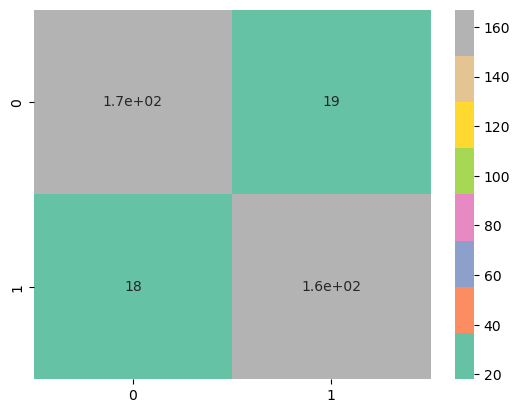

In [14]:
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

# Prediction

In [20]:
# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.models import Model
from keras.layers import Input

# other imports
from sklearn.linear_model import LogisticRegression
import numpy as np
import os
import json
import pickle

In [21]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",
  "features_path"   : "C:/Users/avish/Desktop/cdd/car_damage_check/features.h5",
  "labels_path"     : "C:/Users/avish/Desktop/cdd/car_damage_check/labels.h5",
  "classifier_path" : "C:/Users/avish/Desktop/cdd/car_damage_check/classifier.pickle",
  "model_path"      : "C:/Users/avish/Desktop/cdd/car_damage_check/model",
}

In [22]:
# load the trained logistic regression classifier
print ("[INFO] loading the classifier...")
classifier = pickle.load(open(config["classifier_path"], 'rb'))

# pretrained models needed to perform feature extraction on test data too!
if config["model"] == "vgg16":
	base_model = VGG16(weights=config["weights"])
	model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
	image_size = (224, 224)

else:
	base_model = None

[INFO] loading the classifier...


In [39]:
#read in the image, pre-proces the image and make predictions
img = image.load_img('C:/Users/avish/Desktop/Major2/data1a/training/01-whole/0035.jpg', target_size=image_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
feature = model.predict(x)
flat = feature.flatten()
flat = np.expand_dims(flat, axis=0)
preds = classifier.predict(flat)

1/1 [==============================] - 0s 203ms/step


In [40]:
preds

array([1], dtype=int64)

In [36]:
label_check1 = ['Car is Damaged', 'Car is not Damaged']

In [41]:
label_check1[preds[0]]

'Car is not Damaged'

In [42]:
preds[0]

1